In [ ]:
#r "nuget: Yueyinqiu.Su.D2lTorchSharp, *-*"

using ScottPlot;
using System.Diagnostics;
using TorchSharp;
using Yueyinqiu.Su.D2lTorchSharp;

D2l.Notebook.PrepareAll();

3.1.2. 矢量化加速

In [ ]:
var n = 10000;
var a = torch.ones([n]);
var b = torch.ones([n]);

在 C# 中，我们可以直接使用 `Stopwatch` 进行计时：

In [ ]:
var c = torch.zeros(n);
var timer = Stopwatch.StartNew();
foreach(var i in Enumerable.Range(0, n))
    c[i] = a[i] + b[i];
timer.Stop();

$"{(timer.Elapsed.TotalSeconds):0.00000} sec"

In [ ]:
timer.Restart();
var d = a + b;
timer.Stop();

$"{(timer.Elapsed.TotalSeconds):0.00000} sec"

3.1.3. 正态分布与平方损失

In [ ]:
torch.Tensor normal(torch.Tensor x, double mu, double sigma)
{
    var p = 1 / Math.Sqrt(2 * Math.PI * sigma * sigma);
    return p * torch.exp(-0.5 / (sigma * sigma) * (x - mu).pow(2));
}


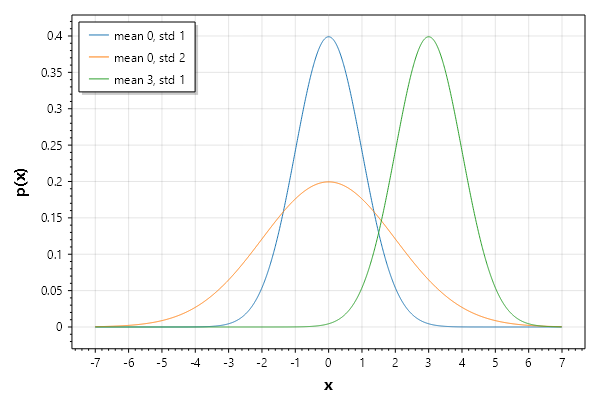

In [6]:
var x = torch.arange(-7, 7, 0.01);

(double, double)[] @params = [(0, 1), (0, 2), (3, 1)];

var plot = new Plot();
foreach(var (mu, sigma) in @params)
    plot.Add.ScatterLine(x, normal(x, mu, sigma), $"mean {mu}, std {sigma}");

plot.Legend.Alignment = Alignment.UpperLeft;
plot.XLabel("x");
plot.YLabel("p(x)");

plot